# Natural Language Processing Fundamentals in Python

In [14]:
#import nltk
#nltk.download('punkt')

In [82]:
# Import the regex module
import re

# Import necessary modules
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt

# Import Counter
from collections import Counter

# Import Dictionary
from gensim.corpora.dictionary import Dictionary

# Import TfidfModel
from gensim.models.tfidfmodel import TfidfModel

# Import spacy
import spacy

# Import the necessary modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import the necessary modules
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

ModuleNotFoundError: No module named 'spacy'

## 1. Regular expressions & word tokenization

In [6]:
my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words"

### Practicing regular expressions: re.split() and re.findall()

In [7]:
# Write a pattern to match sentence endings: sentence_endings
sentence_endings = r"[\.\?\!]"

# Split my_string on sentence endings and print the result
print(re.split(sentence_endings, my_string))
print("---")

# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))
print("---")

# Split my_string on spaces and print the result
spaces = r"\s+"
print(re.split(spaces, my_string))
print("---")

# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, my_string))

["Let's write RegEx", "  Won't that be fun", '  I sure think so', '  Can you find 4 sentences', '  Or perhaps, all 19 words']
---
['Let', 'RegEx', 'Won', 'Can', 'Or']
---
["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'words']
---
['4', '19']


### Word tokenization with NLTK

In [8]:
with open("data/grail_scene1.txt", "r") as f:
    scene_one = f.read()#.replace('\n', '')
scene_one

"SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there?\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!\nSOLDIER #1: Pull the other one!\nARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.\nSOLDIER #1: What?  Ridden on a horse?\nARTHUR: Yes!\nSOLDIER #1: You're using coconuts!\nARTHUR: What?\nSOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.\nARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?\nARTHUR: We found them.\nSOLDIER #1: Found them?  In Mercea?  The coconut's tropical!\nARTHUR: What do you mean?\nSOLDIER #1: Well, this is a t

In [9]:
# Split scene_one into sentences: sentences
sentences = sent_tokenize(scene_one)

# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[3])

# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(scene_one))

# Print the unique tokens result
print(unique_tokens)

{'needs', 'just', 'wind', 'bird', 'Listen', 'Pull', 'Found', 'house', 'order', 'Am', 'defeator', 'sun', 'they', 'African', 'England', 'these', 'but', 'Halt', 'KING', 'Court', '1', 'question', 'swallow', ']', 'minute', 'why', 'In', 'with', 'beat', 'where', 'he', 'A', "'ve", 'do', 'Mercea', 'forty-three', 'by', 'Patsy', 'Uther', '[', 'every', 'ratios', 'Supposing', 'servant', 'zone', 'strand', 'air-speed', 'Saxons', 'through', 'Are', 'could', 'grip', 'ask', 'bring', 'winter', 'Please', 'its', 'feathers', 'temperate', 'using', "'s", 'point', 'simple', 'son', 'ridden', 'must', 'your', 'since', 'line', 'seek', 'carried', "'d", '--', 'master', 'right', 'No', 'kingdom', 'wings', 'Who', 'that', 'agree', 'Pendragon', 'course', 'I', 'court', 'bangin', 'SCENE', 'the', '...', 'under', 'trusty', 'then', 'warmer', 'or', 'Ridden', 'there', 'this', 'wants', 'weight', '?', 'interested', 'at', 'climes', 'a', 'anyway', 'fly', 'European', 'together', 'creeper', 'You', ':', 'martin', 'and', 'SOLDIER', 'be'

### More regex with re.search()

In [10]:
# Search for the first occurrence of "coconuts" in scene_one: match
match = re.search("coconuts", scene_one)

# Print the start and end indexes of match
print(match.start(), match.end())
print("---")

# Write a regular expression to search for anything in square brackets: pattern1
pattern1 = r"\[.*\]"

# Use re.search to find the first text in square brackets
print(re.search(pattern1, scene_one))
print("---")

# Find the script notation at the beginning of the fourth sentence and print it
pattern2 = r"[\w\s]+:"
print(re.match(pattern2, sentences[3]))

580 588
---
<re.Match object; span=(9, 32), match='[wind] [clop clop clop]'>
---
<re.Match object; span=(0, 7), match='ARTHUR:'>


### Regex with NLTK tokenization

In [11]:
tweets = ['This is the best #nlp exercise ive found online! #python',
 '#NLP is super fun! <3 #learning',
 'Thanks @datacamp :) #nlp #python']

In [12]:
# Define a regex pattern to find hashtags: pattern1
pattern1 = r"#\w+"

# Use the pattern on the first tweet in the tweets list
regexp_tokenize(tweets[0], pattern1)

# Write a pattern that matches both mentions and hashtags
pattern2 = r"([@]\w+)"

# Use the pattern on the last tweet in the tweets list
regexp_tokenize(tweets[-1], pattern2)

# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

[['This', 'is', 'the', 'best', '#nlp', 'exercise', 'ive', 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'], ['Thanks', '@datacamp', ':)', '#nlp', '#python']]


### Non-ascii tokenization

In [13]:
german_text = 'Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕'

In [14]:
# Tokenize and print all words in german_text
all_words = word_tokenize(german_text)
print(all_words)
print("---")

# Tokenize and print only capital words
capital_words = r"[A-ZÜ]\w+"
print(regexp_tokenize(german_text,capital_words))
print("---")

# Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(german_text, emoji))

['Wann', 'gehen', 'wir', 'Pizza', 'essen', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕']
---
['Wann', 'Pizza', 'Und', 'Über']
---
['🍕', '🚕']


### Charting practice

In [15]:
with open("data/grail.txt", "r") as f:
    holy_grail = f.read()

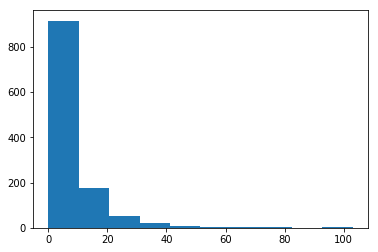

In [16]:
# Split the script into lines: lines
lines = holy_grail.split('\n')

# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]

# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s, "\w+") for s in lines]

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
plt.hist(line_num_words)

# Show the plot
plt.show()

## 2. Simple topic identification

### Building a Counter with bag-of-words

In [28]:
with open("data/Wikipedia articles/wiki_text_debugging.txt", "r") as f:
    article = f.read()
    #article = article.replace('`', '\'')

In [29]:
# Tokenize the article: tokens
tokens = word_tokenize(article)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
print(bow_simple.most_common(10))

[(',', 151), ('the', 150), ('.', 89), ('of', 81), ("''", 66), ('to', 63), ('a', 60), ('``', 47), ('in', 44), ('and', 41)]


### Text preprocessing practice

In [30]:
english_stops = open("data/english_stopwords.txt", "r")
english_stops = english_stops.read().split("\n")

In [22]:
#import nltk
#nltk.download('wordnet')

In [53]:
# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in english_stops]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(10))

[('debugging', 40), ('system', 25), ('bug', 17), ('software', 16), ('problem', 15), ('tool', 15), ('computer', 14), ('process', 13), ('term', 13), ('debugger', 13)]


### Creating and querying a corpus with gensim

In [44]:
# List of file name prefixes
article_names = [
    "bug", 
    "computer", 
    "crash", 
    "debugger", 
    "debugging", 
    "exception", 
    "hopper", 
    "language", 
    "malware", 
    "program", 
    "reversing", 
    "software"]

In [77]:
# Load files
articles = []
for article_name in article_names:
    file_path = "data/" + "Wikipedia articles/" + "wiki_text_" + article_name + ".txt"
    with open(file_path, "r") as f:
        article = f.read()
        articles.append(article)

In [61]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [78]:
# Preprocess data

# Lowercase all words
articles_preprocessed = [a.lower() for a in articles]

# Tokenize
articles_preprocessed = [word_tokenize(a) for a in articles_preprocessed]

# Remove stop words and punctuation
articles_preprocessed = [a for a in articles_preprocessed if a not in english_stops]
import string
articles_preprocessed2 = []
for article in articles_preprocessed:
    temp = [token for token in article if token not in list(string.punctuation)]
    articles_preprocessed2.append(temp)

articles = articles_preprocessed2
# print(articles)

# 30 words in the first document list in articles list
articles[1][1:30]

['system||computer',
 'disambiguation',
 '|and|computer',
 'system',
 'disambiguation',
 'pp-semi-indef',
 'pp-move-indef',
 'infobox|title',
 'computer',
 '|image',
 'div',
 'style=',
 "''",
 'white-space',
 'nowrap',
 "''",
 'file',
 'acer',
 'aspire',
 '8920',
 'gemstone',
 'by',
 'georgy.jpg|x81pxfile',
 'columbia',
 'supercomputer',
 'nasa',
 'advanced',
 'supercomputing',
 'facility.jpg|x81pxfile']

In [74]:
# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(articles)

# Select the id for "computer": computer_id
computer_id = dictionary.token2id.get("computer")

# Use computer_id with the dictionary to print the word
print(dictionary.get(computer_id))

# Create a MmCorpus: corpus
corpus = [dictionary.doc2bow(article) for article in articles]

# Print the first 10 word ids with their frequency counts from the fifth document
print(corpus[4][:10])

computer
[(0, 66), (8, 5), (10, 4), (56, 1), (68, 1), (71, 1), (73, 1), (74, 2), (77, 1), (83, 1)]


### Gensim bag-of-words

In [79]:
from collections import defaultdict
import itertools

In [80]:
# Save the fifth document: doc
doc = corpus[4]

# Sort the doc for frequency: bow_doc
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

# Print the top 5 words of the document alongside the count
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)
    
# Create the defaultdict: total_word_count
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

# Create a sorted list from the defaultdict: sorted_word_count
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

# Print the top 5 words across all documents alongside the count
for word_id, word_count in sorted_word_count[:5]:
    print(dictionary.get(word_id), word_count)

the 150
of 81
'' 66
to 63
a 60
the 2573
of 1580
to 1207
a 1187
and 1131


### Tf-idf with Wikipedia

In [ ]:
# Create a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(corpus)

# Calculate the tfidf weights of doc: tfidf_weights
tfidf_weights = tfidf[doc]

# Print the first five weights
print(tfidf_weights[:5])

# Sort the weights from highest to lowest: sorted_tfidf_weights
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

# Print the top 5 weighted words
for term_id, weight in sorted_tfidf_weights[:5]:
    print(dictionary.get(term_id), weight)

## 3. Named-entity recognition

### NER with NLTK

In [ ]:
# Tokenize the article into sentences: sentences
sentences = nltk.sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

### Charting practice

In [ ]:
# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(l) for l in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

### Comparing NLTK with spaCy NER

In [ ]:
# Instantiate the English model: nlp
nlp = spacy.load("en", tagger=False, parser=False, matcher=False)

# Create a new document: doc
doc = nlp(article)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

### French NER with polyglot I

In [ ]:
# Create a new text object using Polyglot's Text class: txt
txt = Text(article)

# Print each of the entities found
for ent in txt.entities:
    print(ent)
    
# Print the type of ent
print(type(ent))

### French NER with polyglot II

In [ ]:
# Create the list of tuples: entities
entities = [(ent.tag, ' '.join(ent)) for ent in txt.entities]

# Print entities
print(entities)

### Spanish NER with polyglot

In [ ]:
# Initialize the count variable: count
count = 0

# Iterate over all the entities
for ent in txt.entities:
    # Check whether the entity contains 'Márquez' or 'Gabo'
    if "Márquez" in ent or "Gabo" in ent:
        # Increment count
        count += 1

# Print count
print(count)

# Calculate the percentage of entities that refer to "Gabo": percentage
percentage = count / len(txt.entities)
print(percentage)

## 4. Building a "fake news" classifier

### CountVectorizer for text classification

In [ ]:
# Print the head of df
print(df.head())

# Create a series to store the labels: y
y = df.label

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df["text"], y, test_size=0.33, random_state=53)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words="english")

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

### TfidfVectorizer for text classification

In [ ]:
# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])

### Inspecting the vectors

In [ ]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

# Print the head of count_df
print(count_df.head())

# Print the head of tfidf_df
print(tfidf_df.head())

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))

### Training and testing the "fake news" model with CountVectorizer

In [ ]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)

### Training and testing the "fake news" model with TfidfVectorizer

In [ ]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=["FAKE", "REAL"])
print(cm)

### Improving your model

In [ ]:
# Create the list of alphas: alphas
alphas = np.arange(0, 1, 0.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(pred, y_test)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

### Inspecting your model

In [ ]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[0:20])

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])